# Hypothesis Testing with Men's and Women's Soccer Matches

![A soccer pitch for an international match.](https://img.freepik.com/fotos-premium/renderizacao-em-3d-do-estadio_562687-2603.jpg?w=900)

You're working as a sports journalist at a major online sports media company, specializing in soccer analysis and reporting. You've been watching both men's and women's international soccer matches for a number of years, and your gut instinct tells you that more goals are scored in women's international football matches than men's. This would make an interesting investigative article that your subscribers are bound to love, but you'll need to perform a valid statistical hypothesis test to be sure!

While scoping this project, you acknowledge that the sport has changed a lot over the years, and performances likely vary a lot depending on the tournament, so you decide to limit the data used in the analysis to only official `FIFA World Cup` matches (not including qualifiers) since `2002-01-01`.

You create two datasets containing the results of every official men's and women's international football match since the 19th century, which you scraped from a reliable online source. This data is stored in two CSV files: `women_results.csv` and `men_results.csv`.

The question you are trying to determine the answer to is:

> Are more goals scored in women's international soccer matches than men's?

You assume a **10% significance level**, and use the following null and alternative hypotheses:

$H_0$ : The mean number of goals scored in women's international soccer matches is the same as men's.

$H_A$ : The mean number of goals scored in women's international soccer matches is greater than men's.

In [8]:
# Start your code here!
import pandas as pd

CSV_BASE_PATH = './data/raw/'
CSV_PATH_MEN = CSV_BASE_PATH + 'men_results.csv'
CSV_PATH_WOMEN = CSV_BASE_PATH + 'women_results.csv'

In [15]:
df_men = pd.read_csv(CSV_PATH_MEN,
                      index_col=[0],
                      parse_dates=['date'])

df_men.head()

,date,home_team,away_team,home_score,away_score,tournament
0,1872-11-30,Scotland,England,0,0,Friendly
1,1873-03-08,England,Scotland,4,2,Friendly
2,1874-03-07,Scotland,England,2,1,Friendly
3,1875-03-06,England,Scotland,2,2,Friendly
4,1876-03-04,Scotland,England,3,0,Friendly


In [13]:
df_women = pd.read_csv(CSV_PATH_WOMEN,
                       index_col=[0],
                      parse_dates=['date'])

df_women.head()

,date,home_team,away_team,home_score,away_score,tournament
0,1969-11-01,Italy,France,1,0,Euro
1,1969-11-01,Denmark,England,4,3,Euro
2,1969-11-02,England,France,2,0,Euro
3,1969-11-02,Italy,Denmark,3,1,Euro
4,1975-08-25,Thailand,Australia,3,2,AFC Championship


## Tasks

Perform an appropriate hypothesis test to determine the p-value, and hence result, of whether to reject or fail to reject the null hypothesis that the _mean number of goals scored in women's international soccer matches is the same as men's_. Use a **10% significance level**.

For this analysis, you'll use Official `FIFA World Cup` matches since `2002-01-01`, and you'll also assume that each match is fully independent, i.e., team form is ignored.

The p-value and the result of the test _must be_ stored in a dictionary called `result_dict` in the form:

```python
result_dict = {"p_val": p_val, "result": result}
```

Where `p_val` is the p-value and `result` is either the string "`fail to reject`" or "`reject`", depending on the result of the test.

In [11]:
! pip install pingouin

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.6/198.6 kB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7026 sha256=bbb02438e30eab0a2d7d1816cb81795e21adb51e01d79dbbdaa595aa59b74f51
  Stored in directory: /root/.cache/pip/wheels/3d/fe/b0/27a9892da57472e538c7452a721a9cf463cc03cf7379889266
Successfully built littleutils


In [14]:
import matplotlib.pyplot as plt
import pingouin
from scipy.stats import mannwhitneyu

#### Filter by date and tournament

In [21]:
df_men_filter = (df_men['date'] > '2002-01-01') & (df_men['tournament'] == 'FIFA World Cup')

df_men_subset = df_men[df_men_filter]

df_men_subset.head()

,date,home_team,away_team,home_score,away_score,tournament
25164,2002-05-31,France,Senegal,0,1,FIFA World Cup
25165,2002-06-01,Germany,Saudi Arabia,8,0,FIFA World Cup
25166,2002-06-01,Republic of Ireland,Cameroon,1,1,FIFA World Cup
25167,2002-06-01,Uruguay,Denmark,1,2,FIFA World Cup
25168,2002-06-02,Argentina,Nigeria,1,0,FIFA World Cup


In [20]:
df_women_filter = (df_women['date'] > '2002-01-01') & (df_women['tournament'] == 'FIFA World Cup')

df_women_subset = df_women[df_women_filter]

df_women_subset.head()

,date,home_team,away_team,home_score,away_score,tournament
1600,2003-09-20,Nigeria,North Korea,0,3,FIFA World Cup
1601,2003-09-20,Norway,France,2,0,FIFA World Cup
1602,2003-09-20,Germany,Canada,4,1,FIFA World Cup
1603,2003-09-20,Japan,Argentina,6,0,FIFA World Cup
1604,2003-09-21,United States,Sweden,3,1,FIFA World Cup


#### Create column to goals scored

In [22]:
df_men_subset['group'] = 'men'

df_men_subset['goals_scored'] = df_men_subset['home_score'] + df_men_subset['away_score']

df_men_subset.head()

<ipython-input-22-b2cd3b7100a3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_men_subset['group'] = 'men'
<ipython-input-22-b2cd3b7100a3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_men_subset['goals_scored'] = df_men_subset['home_score'] + df_men_subset['away_score']


,date,home_team,away_team,home_score,away_score,tournament,group,goals_scored
25164,2002-05-31,France,Senegal,0,1,FIFA World Cup,men,1
25165,2002-06-01,Germany,Saudi Arabia,8,0,FIFA World Cup,men,8
25166,2002-06-01,Republic of Ireland,Cameroon,1,1,FIFA World Cup,men,2
25167,2002-06-01,Uruguay,Denmark,1,2,FIFA World Cup,men,3
25168,2002-06-02,Argentina,Nigeria,1,0,FIFA World Cup,men,1


In [24]:
df_women_subset['group'] = 'women'

df_women_subset['goals_scored'] = df_women_subset['home_score'] + df_women_subset['away_score']

df_women_subset.head()

<ipython-input-24-62cd378cf40c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_women_subset['group'] = 'women'
<ipython-input-24-62cd378cf40c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_women_subset['goals_scored'] = df_women_subset['home_score'] + df_women_subset['away_score']


,date,home_team,away_team,home_score,away_score,tournament,group,goals_scored
1600,2003-09-20,Nigeria,North Korea,0,3,FIFA World Cup,women,3
1601,2003-09-20,Norway,France,2,0,FIFA World Cup,women,2
1602,2003-09-20,Germany,Canada,4,1,FIFA World Cup,women,5
1603,2003-09-20,Japan,Argentina,6,0,FIFA World Cup,women,6
1604,2003-09-21,United States,Sweden,3,1,FIFA World Cup,women,4


#### Plot goals distribuition

<Axes: ylabel='Frequency'>

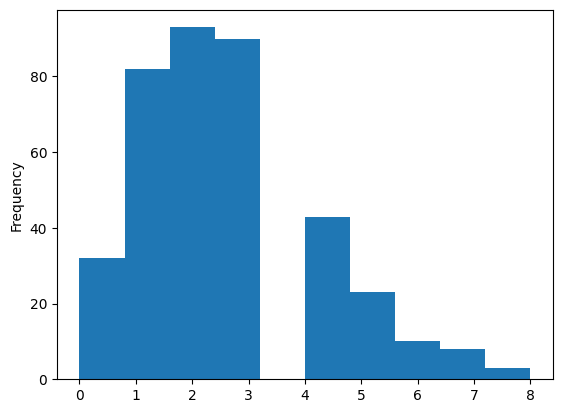

In [25]:
df_men_subset['goals_scored'].plot(kind='hist')

<Axes: ylabel='Frequency'>

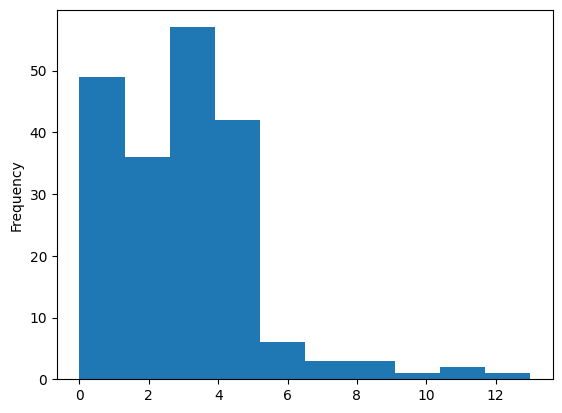

In [26]:
df_women_subset['goals_scored'].plot(kind='hist')

## Combine and transform data in men and women datasets

In [27]:
df_men_women = pd.concat([df_men_subset, df_women_subset],
                         axis=0,
                         ignore_index=True)

df_men_women.head()

,date,home_team,away_team,home_score,away_score,tournament,group,goals_scored
0,2002-05-31,France,Senegal,0,1,FIFA World Cup,men,1
1,2002-06-01,Germany,Saudi Arabia,8,0,FIFA World Cup,men,8
2,2002-06-01,Republic of Ireland,Cameroon,1,1,FIFA World Cup,men,2
3,2002-06-01,Uruguay,Denmark,1,2,FIFA World Cup,men,3
4,2002-06-02,Argentina,Nigeria,1,0,FIFA World Cup,men,1


In [28]:
df_men_women_subset = df_men_women[['goals_scored', 'group']]

df_men_women_subset_wide = df_men_women_subset.pivot(columns='group',
                                                     values='goals_scored')

df_men_women_subset_wide.head()

group,men,women
0,1.0,NaN
1,8.0,NaN
2,2.0,NaN
3,3.0,NaN
4,1.0,NaN


#### Using pingouin to perform right-tailed Wilcoxon-Mann-Whitneym

In [29]:
result_pg = pingouin.mwu(x=df_men_women_subset_wide['women'],
                         y=df_men_women_subset_wide['men'],
                         alternative='greater')

result_pg

,U-val,alternative,p-val,RBC,CLES
MWU,43273.0,greater,0.005107,-0.126901,0.563451


In [32]:
p_value = result_pg['p-val'].values[0]

p_value

0.005106609825443641

#### Using Scipy to perform right-tailed Wilcoxon-Mann-Whitneym

In [30]:
result_scipy = mannwhitneyu(x=df_men_subset['goals_scored'],
                            y=df_women_subset['goals_scored'],
                            alternative='greater')

result_scipy

MannwhitneyuResult(statistic=33527.0, pvalue=0.9949011518870854)

#### Define final conclusions

In [33]:
result_dict = {'p_val': p_value,
               'result': 'reject' if p_value <= .01 else 'fail to reject'}

result_dict

{'p_val': 0.005106609825443641, 'result': 'reject'}